<a href="https://colab.research.google.com/github/Benqui/facial-recognition-on-keras/blob/main/modelos-keras/60_modelo_vgg16_cluster_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install brewer2mpl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
import random
import sys
import warnings 
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import brewer2mpl


def emotion_count(y_train, classes):
    """
    The function re-classify picture with disgust label into angry label
    """
    emo_classcount = {}
    print ('Disgust classified as Angry')
    y_train.loc[y_train == 1] = 0
    classes.remove('Disgust')
    for new_num, _class in enumerate(classes):
        y_train.loc[(y_train == emotion[_class])] = new_num
        class_count = sum(y_train == (new_num))
        emo_classcount[_class] = (new_num, class_count)
    return y_train.values, emo_classcount

In [6]:
def load_data(sample_split=0.3, usage='Training',classes=['Angry','Happy'], filepath='../content/drive/MyDrive/reconocer-jetas/fer2013/fer2013.csv'):
   
    """
    carga el csv que tiene el dataset y la hace rechape, lo reescala 
    """
    df = pd.read_csv(filepath)
    df = df[df.Usage == usage]
    frames = []
    classes.append('Disgust')
    for _class in classes:
        class_df = df[df['emotion'] == emotion[_class]]
        frames.append(class_df)
    data = pd.concat(frames, axis=0)
    rows = random.sample(list(data.index), int(len(data)*sample_split))
    data = data.loc[rows]
    x = list(data["pixels"])
    X = []
    for i in range(len(x)):
        each_pixel = [int(num) for num in x[i].split()]
        X.append(each_pixel)
    ## reshape into 48*48*1 and rescale
    X = np.array(X)
    X = X.reshape(X.shape[0], 48, 48,1)
    X = X.astype("float32")
    X /= 255
    
    y_train, new_dict = emotion_count(data.emotion, classes)
    y_train = to_categorical(y_train)
    return X, y_train

In [7]:
def gray_to_rgb(gray_imgs):
    # Convert numpy array to TensorFlow tensor
    gray_imgs_tensor = tf.convert_to_tensor(gray_imgs, dtype=tf.float32)

    # Convert grayscale images to RGB images
    rgb_images = tf.image.grayscale_to_rgb(gray_imgs_tensor)

    # Convert the tensor to a numpy array
    rgb_images_array = rgb_images.numpy()

    return rgb_images_array

In [8]:
def overview(start, end, X):
    """
    The function is used to plot first several pictures for overviewing inputs format
    """
    fig = plt.figure(figsize=(48,48))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

In [9]:
emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}
emo     = ['Angry', 'Fear', 'Happy',
           'Sad', 'Surprise', 'Neutral']

filepath = '/content/drive/MyDrive/reconocer-jetas/fer2013/fer2013.csv'

x_test, y_test = load_data(sample_split=1.0,classes=emo,usage='PrivateTest',filepath=filepath)

x_train, y_train = load_data(sample_split=1.0,classes=emo,usage= 'Training',filepath=filepath)


Disgust classified as Angry
Disgust classified as Angry


In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28709, 48, 48, 1)
(28709, 6)
(3589, 48, 48, 1)
(3589, 6)


In [11]:
x_train = gray_to_rgb(x_train)
x_test = gray_to_rgb(x_test)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28709, 48, 48, 3)
(28709, 6)
(3589, 48, 48, 3)
(3589, 6)


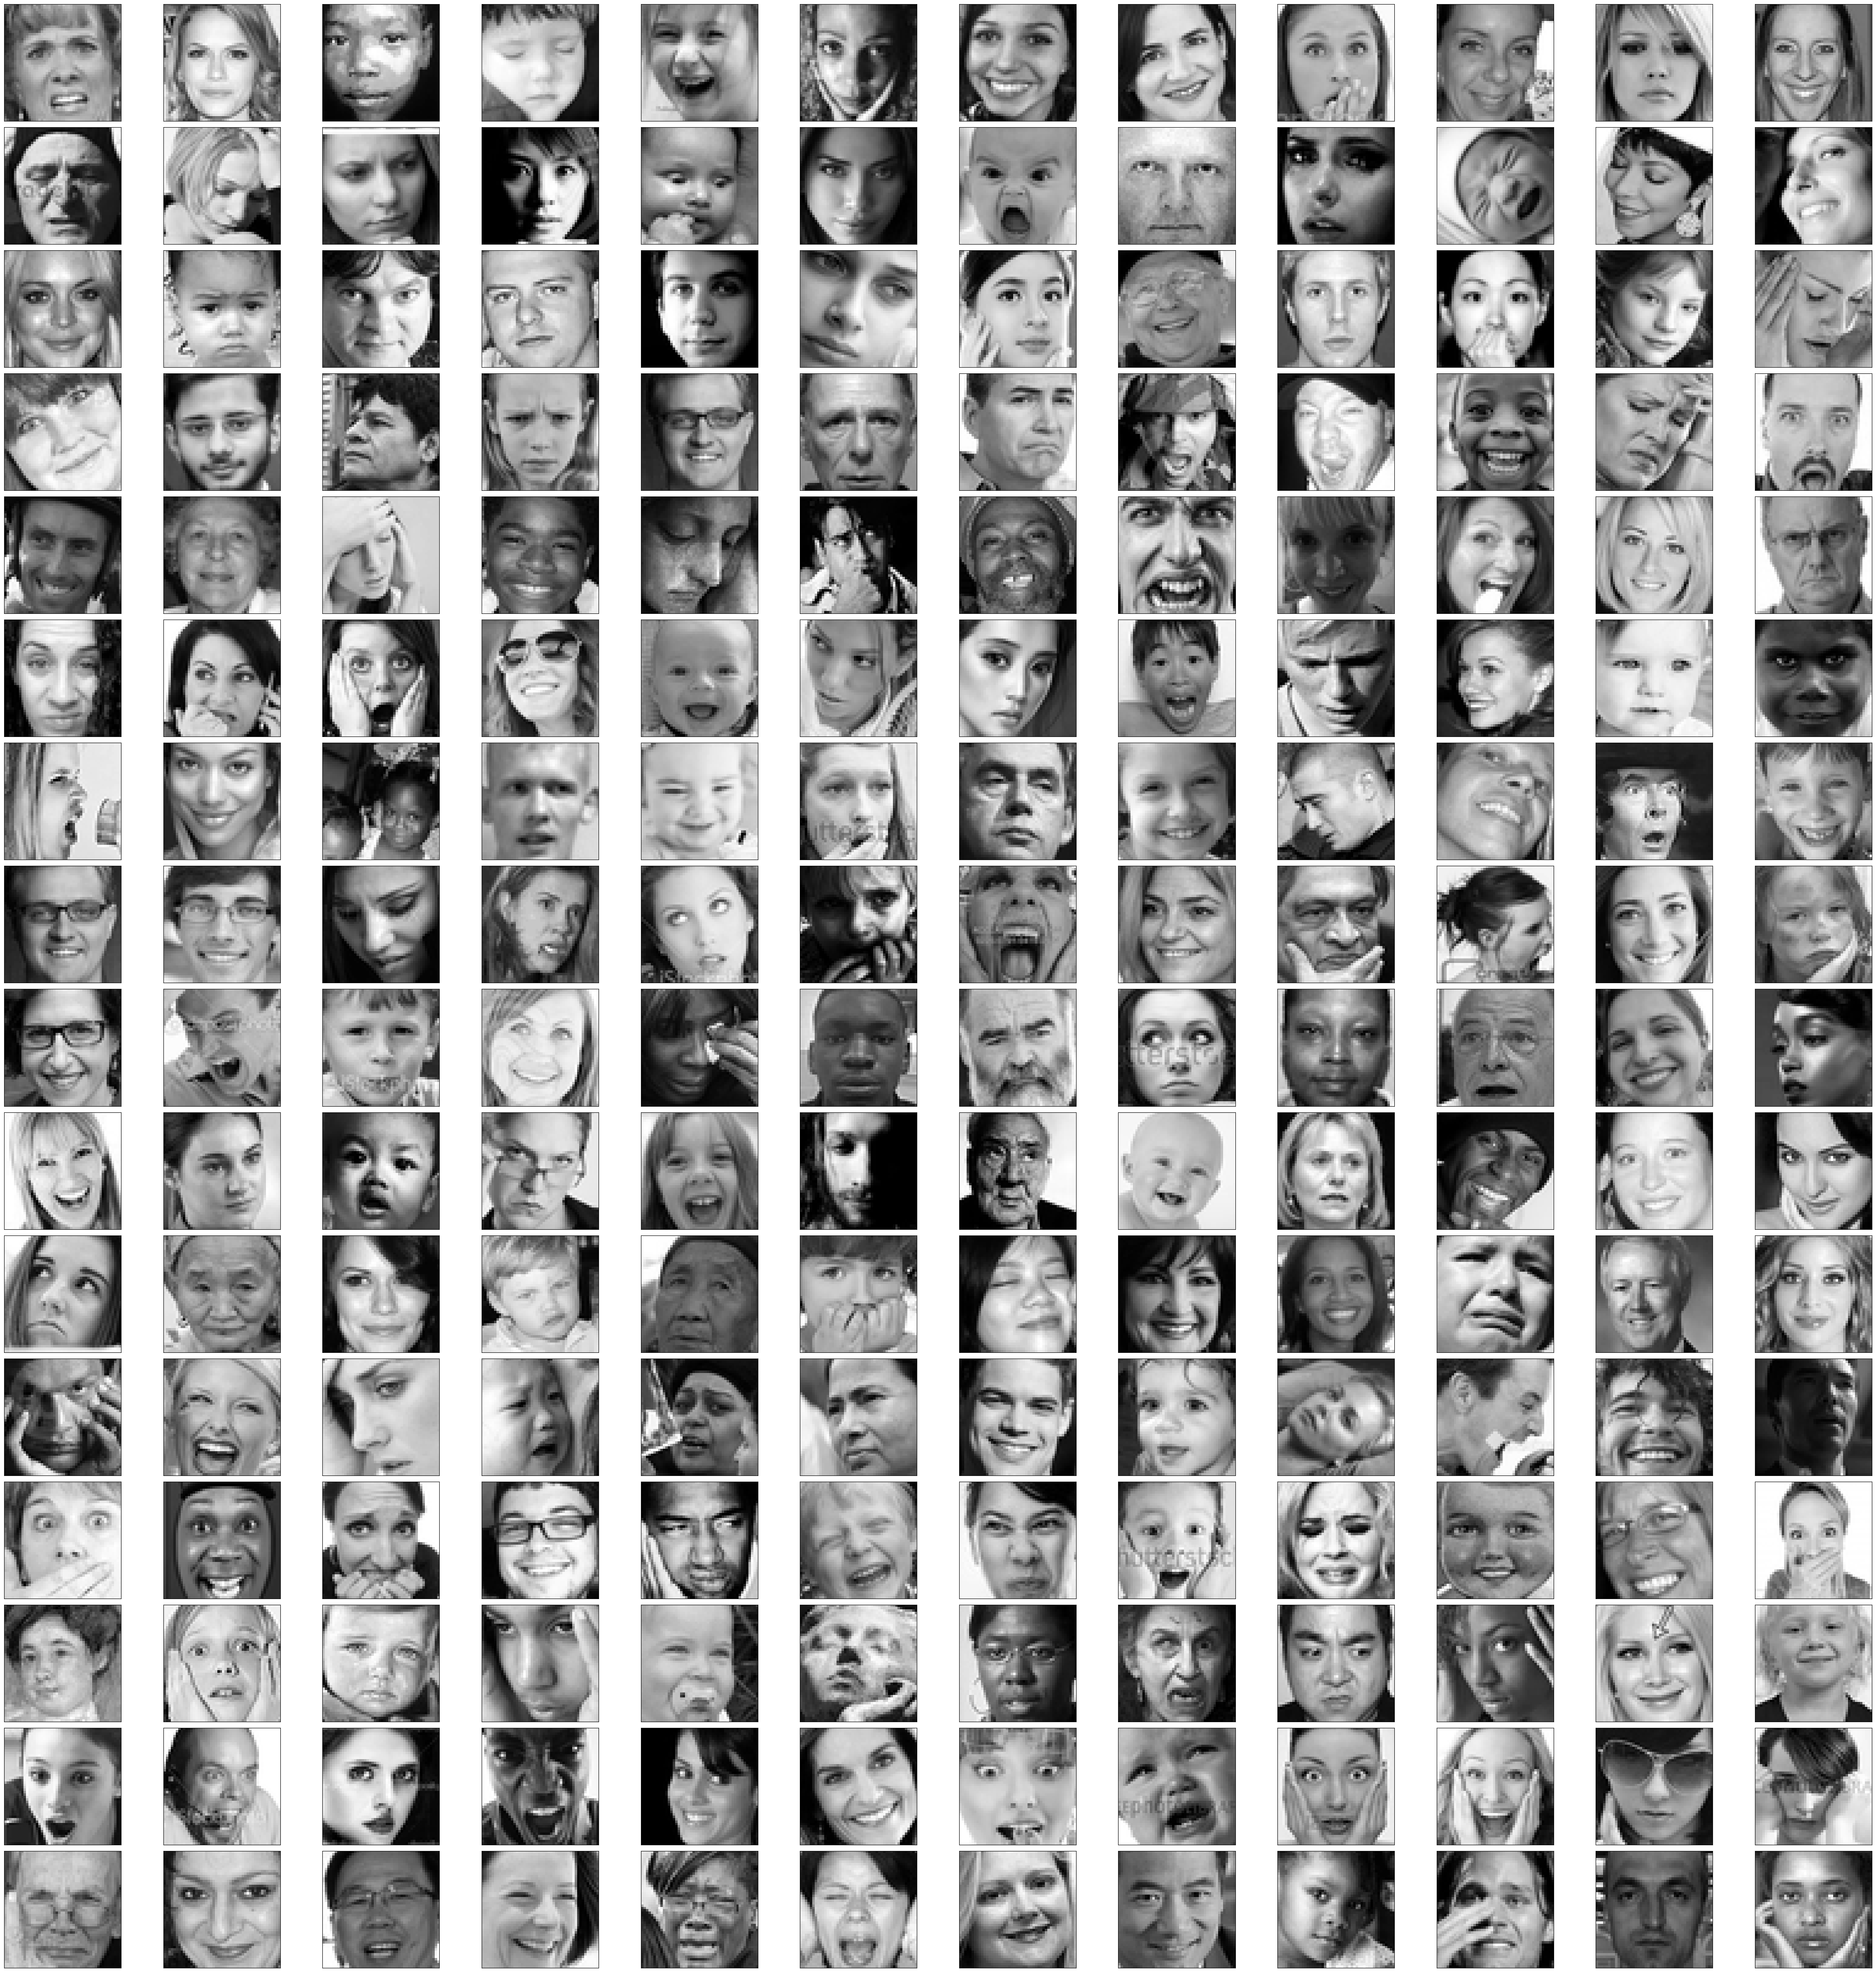

In [13]:
overview(0,191, x_train)

(1, 48, 48, 3)


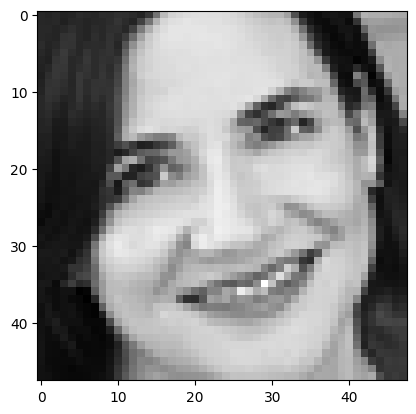

In [14]:
input_img = x_train[7:8,:,:,:] 
print (input_img.shape)
plt.imshow(input_img[0,:,:,0], cmap='gray')
plt.show()

In [15]:
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation


In [16]:
from tensorflow.keras.applications import MobileNet, VGG16, ResNet50, VGG19
import tensorflow as tf

In [17]:
pre_trained_model = base_model = tf.keras.applications.VGG16(input_shape=(48,48,3),include_top=False,weights="imagenet") 


58889256/58889256 [==============================] - 4s 0us/step


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization, Dense, Activation


modelo=Sequential()
modelo.add(pre_trained_model)
modelo.add(Flatten())
# modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dense(6,activation='softmax'))


In [23]:
modelo.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history=modelo.fit(x_train, y_train, epochs=120, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/120
449/449 [==============================] - 44s 66ms/step - loss: 6.4235 - accuracy: 0.2482 - val_loss: 1.6684 - val_accuracy: 0.2945
Epoch 2/120
449/449 [==============================] - 29s 64ms/step - loss: 1.5162 - accuracy: 0.3704 - val_loss: 1.3109 - val_accuracy: 0.4767
Epoch 3/120
449/449 [==============================] - 29s 64ms/step - loss: 1.2636 - accuracy: 0.5031 - val_loss: 1.2053 - val_accuracy: 0.5308
Epoch 4/120
449/449 [==============================] - 28s 63ms/step - loss: 1.1507 - accuracy: 0.5563 - val_loss: 1.1946 - val_accuracy: 0.5469
Epoch 5/120
449/449 [==============================] - 29s 64ms/step - loss: 1.0631 - accuracy: 0.5962 - val_loss: 1.1581 - val_accuracy: 0.5570
Epoch 6/120
449/449 [==============================] - 28s 63ms/step - loss: 0.9863 - accuracy: 0.6279 - val_loss: 1.1188 - val_accuracy: 0.5837
Epoch 7/120
449/449 [==============================] - 29s 64ms/step - loss: 0.9177 - accuracy: 0.6574 - val_loss: 1.0463 - val_ac

In [26]:
loss, accuracy = modelo.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

113/113 [==============================] - 2s 12ms/step - loss: 22.8092 - accuracy: 0.6043
Test Loss: 22.809202194213867
Test Accuracy: 0.6043466329574585


In [27]:
import matplotlib.pyplot as plt

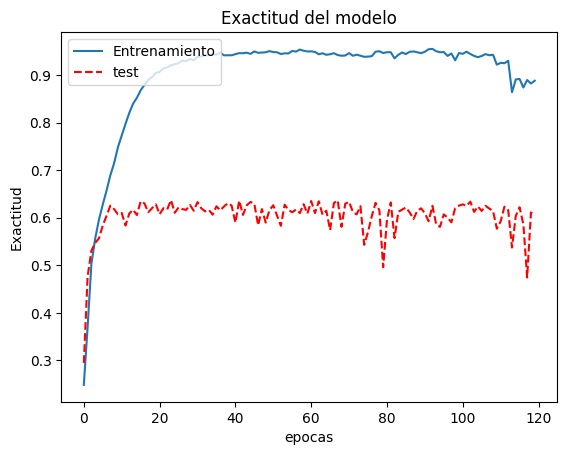

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

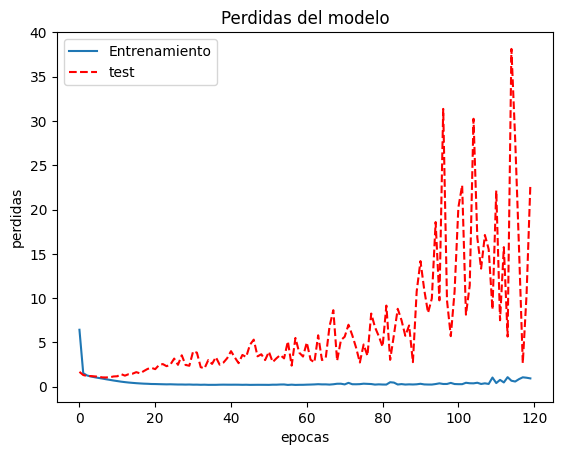

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

In [30]:
from tensorflow.keras.models import load_model

modelo.save('/content/drive/MyDrive/reconocer-jetas/modelos_propios/modelo_mkar7-vgg16-160-mark2.h5')